In [1]:
import pandas as pd
from tensorflow.keras.models import load_model
import tensorflow_hub as hub
import tensorflow as tf
import pathlib
import cv2


In [2]:
from string import ascii_lowercase as alc

ASL_map = {}
for i in range(0, 26):
    ASL_map[i] = alc[i]
ASL_map[26] = 'del'
ASL_map[27] = 'nothing'
ASL_map[28] = 'space'
ASL_map


{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: 'del',
 27: 'nothing',
 28: 'space'}

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
model_Efficientnet = load_model('/content/gdrive/MyDrive/CMPE255_ASL_PROJECT/Efficientnet_model_new.h5', custom_objects={'KerasLayer':hub.KerasLayer})


In [5]:
model_Efficientnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Efficientnet_b0 (KerasLayer  (None, 1000)             5330564   
 )                                                               
                                                                 
 dense (Dense)               (None, 512)               512512    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 Output_layer (Dense)        (None, 29)                14877     
                                                                 
Total params: 5,857,953
Trainable params: 527,389
Non-trainable params: 5,330,564
_________________________________________________________________


In [ ]:
from PIL import Image
# Opens a image in RGB mode
im = Image.open("/content/A_test.jpg")
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size

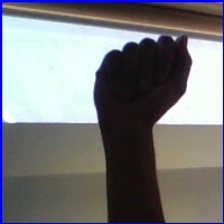

In [ ]:
newsize = (224, 224)
im1 = im.resize(newsize)
# Shows the image in image viewer
display(im1)

In [6]:
import numpy as np
from google.colab.patches import cv2_imshow
def prepare(filepath):
    image = cv2.imread(filepath)
    image = cv2.resize(image, (224,224))
   # image.reshape(-1, 224, 224, 3)
    cv2_imshow(image)
    image = image[np.newaxis, :,  :, :]
    return image.astype('float32')/255.0


In [ ]:
a=model_Efficientnet.predict(prepare('/content/A_test.jpg'))
type(a)

1/1 [==============================] - 1s 800ms/step


numpy.ndarray

In [ ]:
a

array([[3.1968202e-02, 1.5800484e-07, 4.0096099e-12, 9.5725251e-12,
        9.6595144e-01, 6.0871952e-09, 2.7367142e-10, 3.2188509e-16,
        2.0378118e-07, 1.7984416e-09, 7.6244028e-12, 1.3173167e-10,
        4.8289248e-09, 1.7019296e-11, 6.6009459e-10, 2.3007063e-17,
        1.3543889e-18, 2.9367545e-10, 2.0149741e-03, 6.1318613e-05,
        4.8100547e-12, 2.6862535e-11, 2.1765758e-12, 4.7404006e-07,
        3.0187126e-09, 3.2366811e-06, 1.4802466e-13, 1.4624703e-14,
        8.7039170e-13]], dtype=float32)

In [7]:
def get_top_x(index, x):
  result = sorted(range(len(index[0])), key=lambda i: index[0][i])
  result.reverse()

  for i in result[:x]:
    print(ASL_map[i])
  print()
  print()

In [8]:
!unzip -q /content/asl_alphabet_test.zip

In [12]:
f = '/content/asl_alphabet_test/asl_alphabet_test'
import os


In [10]:
def pass_folder(folder):
  for file in os.listdir(folder):
    f = os.path.join(folder, file)
    print(f)
    get_top_x(model_Efficientnet.predict(prepare(f)), 3)
    


/content/asl_alphabet_test/asl_alphabet_test/L_test.jpg


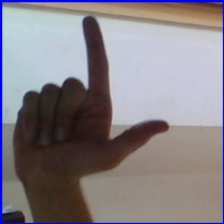

1/1 [==============================] - 1s 880ms/step
l
y
t


/content/asl_alphabet_test/asl_alphabet_test/M_test.jpg


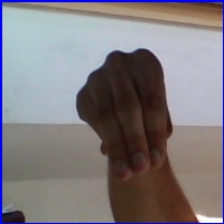

1/1 [==============================] - 0s 81ms/step
m
n
z


/content/asl_alphabet_test/asl_alphabet_test/V_test.jpg


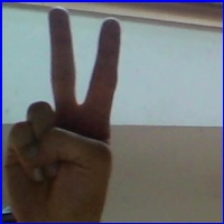

1/1 [==============================] - 0s 100ms/step
v
w
k


/content/asl_alphabet_test/asl_alphabet_test/O_test.jpg


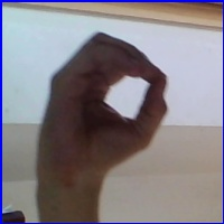

1/1 [==============================] - 0s 102ms/step
o
d
f


/content/asl_alphabet_test/asl_alphabet_test/Y_test.jpg


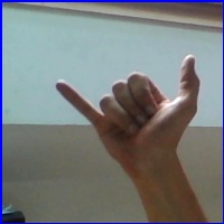

1/1 [==============================] - 0s 85ms/step
y
j
z


/content/asl_alphabet_test/asl_alphabet_test/D_test.jpg


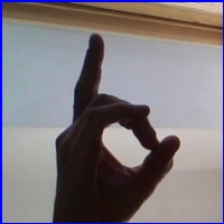

1/1 [==============================] - 0s 82ms/step
d
f
o


/content/asl_alphabet_test/asl_alphabet_test/B_test.jpg


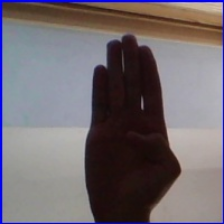

1/1 [==============================] - 0s 81ms/step
b
u
e


/content/asl_alphabet_test/asl_alphabet_test/R_test.jpg


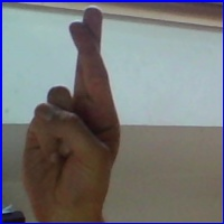

1/1 [==============================] - 0s 97ms/step
r
i
u


/content/asl_alphabet_test/asl_alphabet_test/C_test.jpg


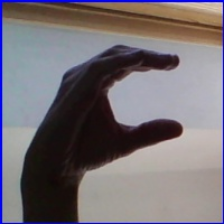

1/1 [==============================] - 0s 87ms/step
c
q
h


/content/asl_alphabet_test/asl_alphabet_test/J_test.jpg


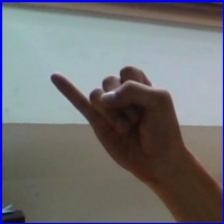

1/1 [==============================] - 0s 90ms/step
j
z
i


/content/asl_alphabet_test/asl_alphabet_test/W_test.jpg


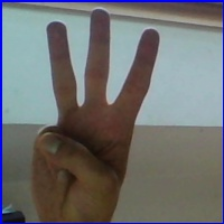

1/1 [==============================] - 0s 82ms/step
w
v
k


/content/asl_alphabet_test/asl_alphabet_test/K_test.jpg


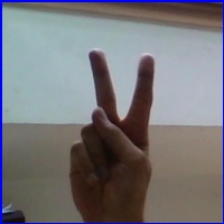

1/1 [==============================] - 0s 79ms/step
v
k
w


/content/asl_alphabet_test/asl_alphabet_test/E_test.jpg


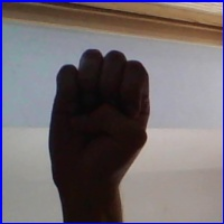

1/1 [==============================] - 0s 101ms/step
e
s
b


/content/asl_alphabet_test/asl_alphabet_test/U_test.jpg


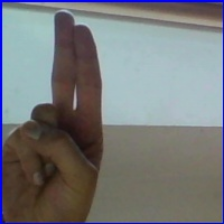

1/1 [==============================] - 0s 84ms/step
u
r
v


/content/asl_alphabet_test/asl_alphabet_test/P_test.jpg


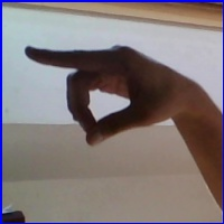

1/1 [==============================] - 0s 87ms/step
p
q
space


/content/asl_alphabet_test/asl_alphabet_test/Z_test.jpg


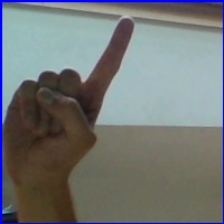

1/1 [==============================] - 0s 114ms/step
z
j
i


/content/asl_alphabet_test/asl_alphabet_test/G_test.jpg


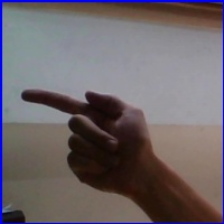

1/1 [==============================] - 0s 84ms/step
g
h
j


/content/asl_alphabet_test/asl_alphabet_test/space_test.jpg


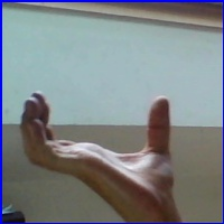

1/1 [==============================] - 0s 79ms/step
space
v
del


/content/asl_alphabet_test/asl_alphabet_test/A_test.jpg


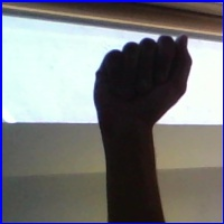

1/1 [==============================] - 0s 94ms/step
e
a
s


/content/asl_alphabet_test/asl_alphabet_test/S_test.jpg


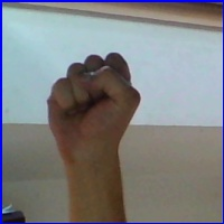

1/1 [==============================] - 0s 86ms/step
s
x
i


/content/asl_alphabet_test/asl_alphabet_test/Q_test.jpg


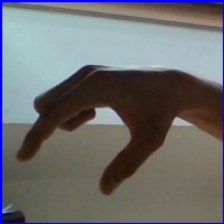

1/1 [==============================] - 0s 88ms/step
q
del
c


/content/asl_alphabet_test/asl_alphabet_test/nothing_test.jpg


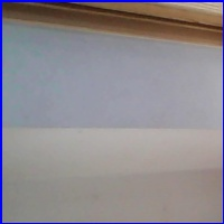

1/1 [==============================] - 0s 99ms/step
nothing
u
h


/content/asl_alphabet_test/asl_alphabet_test/T_test.jpg


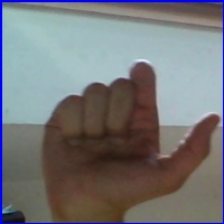

1/1 [==============================] - 0s 104ms/step
t
x
y


/content/asl_alphabet_test/asl_alphabet_test/I_test.jpg


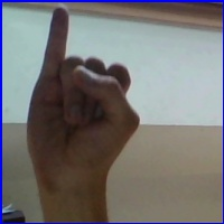

1/1 [==============================] - 0s 84ms/step
i
j
r


/content/asl_alphabet_test/asl_alphabet_test/F_test.jpg


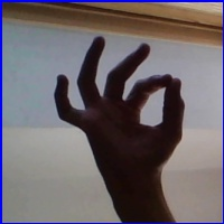

1/1 [==============================] - 0s 89ms/step
f
y
w


/content/asl_alphabet_test/asl_alphabet_test/N_test.jpg


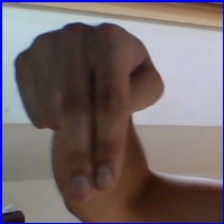

1/1 [==============================] - 0s 86ms/step
n
m
g


/content/asl_alphabet_test/asl_alphabet_test/H_test.jpg


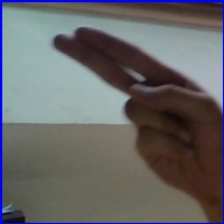

1/1 [==============================] - 0s 96ms/step
h
g
q


/content/asl_alphabet_test/asl_alphabet_test/X_test.jpg


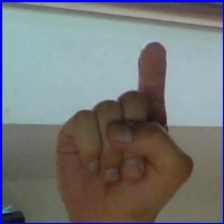

1/1 [==============================] - 0s 94ms/step
x
s
v




In [13]:
pass_folder(f)